<a href="https://colab.research.google.com/github/Americium7/portfolio/blob/main/Machine%20Learning%20Assignment%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MATH Machine Learning Phase 2

# Introduction

The primary objective of this project is to predict the target feature that is the 
churn of a customer using the telecom users dataset from Kaggle. As churn is categorized as yes
or no, this can be called as classification problem because the target feature
is a decriptive feature.



# Report Overview


* [Overview of Methodology](#Overview-of-Methodology)

* [Encoding and Scaling](#Encoding-and-Scaling)

* [Feature Selection](#Feature-Selection)
  +  [F-Score](#F-Score)
  +  [Mutual Information](#Mutual-Information)
  +  [Random Forest](#Random-Forest)
  +   [SPSA](#SPSA)

*  [Sampling](#sample)


*  [Classifiers](#class)
    
   +  [KNN](#knn)
   +  [Decision Trees](#dt)
   +  [Naive Bayes](#nb)
   +  [SVM](#svm)
   +  [Bagging](#bagging)
   +  [Gradient Boosting](#GB)

*  [Model Comparision](#mod)
*  [Critique & Limitations](#Critique-&-Limitations)

*  [Summary & Conclusions](#Summary-&-Conclusions)

    + [Project Summary](#Project-Summary)
    + [Summary of Findings](Summary-of-Findings)
    + [Conclusion](#Conclusion)

## Overview of Methodology


We perform one hot encoding of the Desciptive features and the Target encoding oth the Target feature.

We then scale our data 

We split data into test and train sets with a ratio of 70:30


The following feature selection methods are used:
F-score <br>
Mutual information <br>
Random forest importance  <br>
SPSA <br>

Of which we find that SPSA method is the most effective.

The following algorithms are used subsequently for the predictive modelling

.K-Nearest Neighbors  <br>
.Decision trees <br>
.Naive Bayes  <br>
.SVM <br>
.Bagging <br>
.Gradient Boosting <br>

We check the models with repect to AUC.
We then compare the models we have created using paired t-tests




We fit the model on train data and evaluate its performance on the test dataset. 
we conduct a 5-fold stratified cross-validation to fine-tune hyperparameters of each classifier
we use the Grid search function that searches through all the best combinations in the train phase 
and provide the hyperaparameters with the highest accuracy score.

We use the plot to show the same.


Once we have identify the respectiver hyper parameters for the respective classifiers we fit the model on the test data

After subsequently performing all the above algorithms 
We compare the Models using paired t-tests to see if there is a statistical significance.
And construct a classification report for each of the models with respect to their recall scores and confusion matrices on the test data.


In [ ]:
import warnings 
warnings.filterwarnings("ignore")#ignore warnings command
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None) 


from IPython.display import display, HTML
#reading the data file
tel_sample = pd.read_csv('tel_sample.csv')


## Encoding and Scaling

In [ ]:
Data3 = tel_sample.drop(columns = 'Churn')
target = tel_sample['Churn']


In [ ]:
target = pd.get_dummies(target, drop_first= True)

In [ ]:
Data2 = pd.get_dummies(Data3, columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling'],drop_first= True)

In [ ]:
le = preprocessing.LabelEncoder()
Data2['MultipleLines'] = le.fit_transform(Data2['MultipleLines'])
Data2['InternetService'] = le.fit_transform(Data2['InternetService'])
Data2['OnlineSecurity'] = le.fit_transform(Data2['OnlineSecurity'])
Data2['OnlineBackup'] = le.fit_transform(Data2['OnlineBackup'])
Data2['DeviceProtection'] = le.fit_transform(Data2['DeviceProtection'])
Data2['TechSupport'] = le.fit_transform(Data2['TechSupport'])
Data2['StreamingTV'] = le.fit_transform(Data2['StreamingTV'])
Data2['StreamingMovies'] = le.fit_transform(Data2['StreamingMovies'])
Data2['Contract'] = le.fit_transform(Data2['Contract'])
Data2['PaymentMethod'] = le.fit_transform(Data2['PaymentMethod'])



In [ ]:
Data2.shape

(2000, 19)

In [ ]:
Data2.sample(n=10, random_state=999)

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
1015,0,58,2,1,0,2,0,2,2,0,1,1,94.70,5430.35,1,1,1,1,1
1990,0,13,2,0,2,2,2,2,2,2,2,1,88.95,1161.75,0,0,1,1,0
672,0,2,1,0,0,0,0,0,2,2,0,2,45.25,85.50,0,0,0,0,1
624,1,20,2,1,0,0,0,0,2,0,0,2,84.35,1745.20,1,0,0,1,1
1497,0,67,0,2,1,1,1,1,1,1,1,2,20.55,1343.40,0,0,0,1,0
111,0,9,2,1,0,2,0,0,2,2,0,1,99.30,918.75,1,0,0,1,1
1350,0,64,2,1,2,2,2,2,2,2,1,2,115.00,7396.15,0,1,0,1,1
1158,0,2,0,1,0,0,0,0,0,0,0,2,69.65,145.15,0,0,0,1,0
803,0,41,2,1,0,0,2,0,2,2,0,0,98.05,3990.60,0,0,0,1,0
100,0,35,0,0,2,2,2,0,0,0,0,3,61.00,2130.45,1,1,0,1,0


In [ ]:
Data2 = preprocessing.MinMaxScaler().fit_transform(Data2)

In [ ]:
clf = DecisionTreeClassifier(random_state=999)

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

In [ ]:
scoring_metric = 'accuracy'

In [ ]:
Data= Data2
target2= target

In [ ]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size = 0.3, random_state=999)

In [ ]:
print(D_train.shape)
print(D_test.shape)

(1400, 19)
(600, 19)


In [ ]:
Data = D_train
target= t_train

## Feature Selection

In [ ]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)

In [ ]:
cv_results_full

array([0.70714286, 0.70714286, 0.71428571, 0.69642857, 0.68928571,
       0.70714286, 0.725     , 0.725     , 0.75357143, 0.71785714,
       0.75357143, 0.725     , 0.68928571, 0.76071429, 0.81428571])

In [ ]:
cv_results_full.mean().round(3)

0.726

In [ ]:
num_features = 5

### F-Score

In [ ]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([10,  1,  4,  7, 12])

In [ ]:
best_features_fscore = Data3.columns[fs_indices_fscore].values
best_features_fscore

array(['DeviceProtection', 'SeniorCitizen', 'tenure', 'InternetService',
       'StreamingTV'], dtype=object)

In [ ]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([225.87299355, 143.86812413, 139.13209918,  72.04011174,
        48.4735121 ])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    



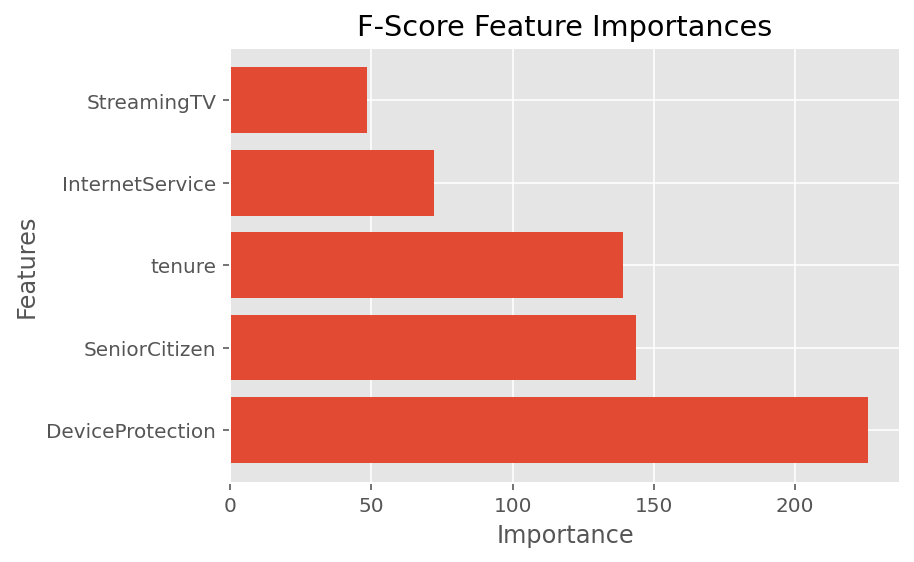

In [ ]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

In [ ]:
Data[:, fs_indices_fscore].shape

(1400, 5)

In [ ]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.716

### Mutual Information

In [ ]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data3.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['DeviceProtection', 'SeniorCitizen', 'tenure', 'StreamingMovies',
       'MultipleLines'], dtype=object)

In [ ]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.1094405 , 0.07458282, 0.07076606, 0.04906222, 0.04846552])

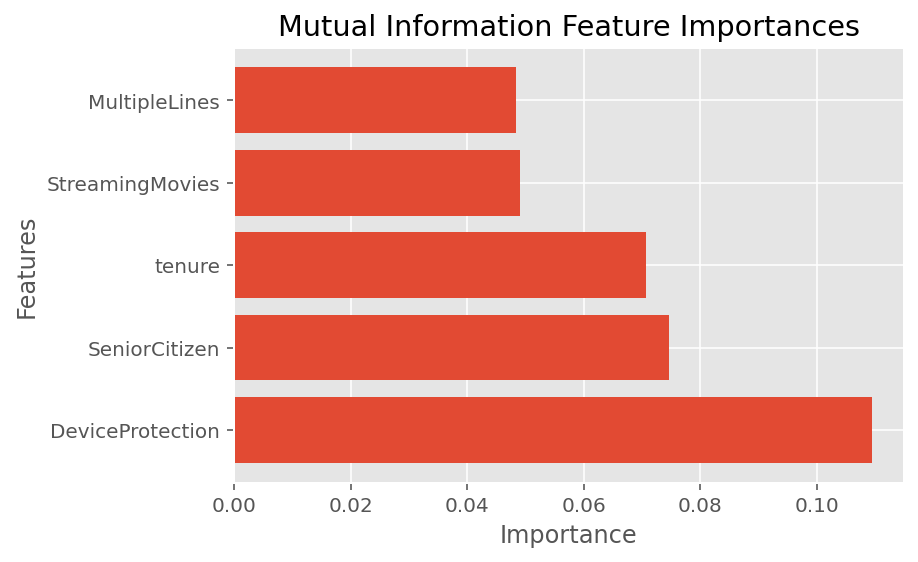

In [ ]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [ ]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.73

### Random Forest

In [ ]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [ ]:
best_features_rfi = Data3.columns[fs_indices_rfi].values
best_features_rfi

array(['StreamingMovies', 'StreamingTV', 'SeniorCitizen',
       'DeviceProtection', 'tenure'], dtype=object)

In [ ]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.19029179, 0.16890633, 0.14644414, 0.07411214, 0.05678656])

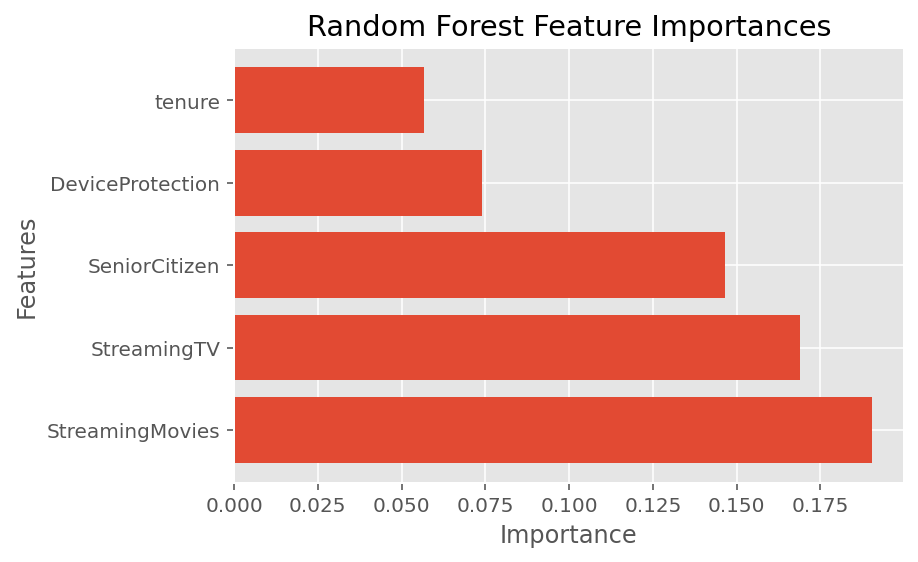

In [ ]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.72

### SPSA

In [ ]:
from spFSR import SpFSR

# set the engine parameters
# pred_type needs to be 'c' for classification and 'r' for regression datasets
sp_engine = SpFSR(x=Data, y=target, pred_type='c', wrapper=clf, scoring='accuracy')

In [ ]:
np.random.seed(999)
sp_output = sp_engine.run(num_features=num_features).results

SpFSR-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=999, splitter='best')
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: accuracy
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 1400
SpFSR-INFO: Number of observations used: 1400
SpFSR-INFO: Number of features available: 19
SpFSR-INFO: Number of features to select: 5
SpFSR-INFO: iter_no: 0, num_ft: 5, value: 0.711, st_dev: 0.022, best: 0.711 @ iter_no 0
SpFSR-INFO: iter_no: 10, num_ft: 5, value: 0.737, st_dev: 0.021, best: 0.737 @ iter_no 10
SpFSR-INFO: ===> it

In [ ]:
fs_indices_spsa = sp_output.get('selected_features')
fs_indices_spsa

[3, 10, 4, 16, 11]

In [ ]:
best_features_spsa = Data3.columns[fs_indices_spsa]
best_features_spsa

Index(['Dependents', 'DeviceProtection', 'tenure', 'PaymentMethod',
       'TechSupport'],
      dtype='object')

In [ ]:
feature_importances_spsa = sp_output.get('selected_ft_importance')
feature_importances_spsa

array([0.42046949, 0.39904868, 0.33919278, 0.12041946, 0.02150154])

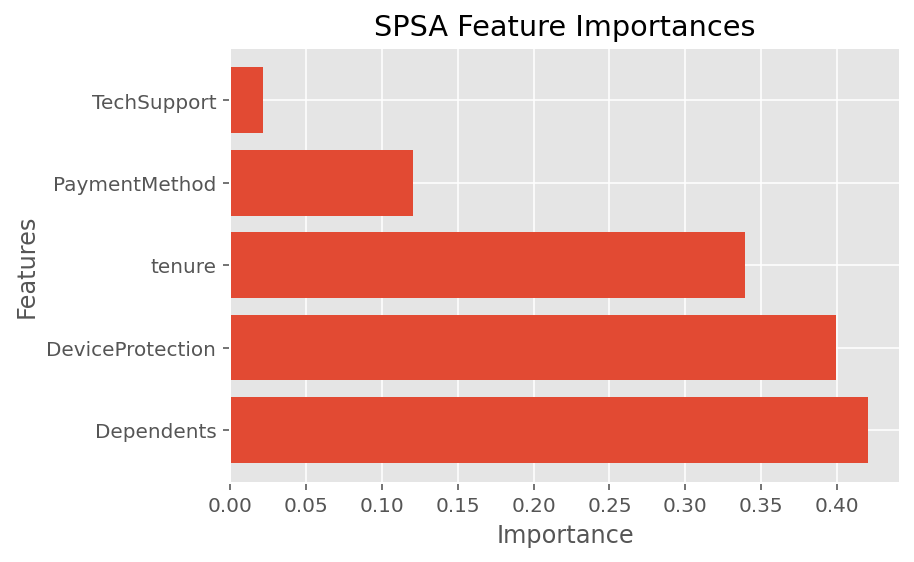

In [ ]:
plot_imp(best_features_spsa, feature_importances_spsa, 'SPSA')

In [ ]:
cv_results_spsa = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_spsa],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spsa.mean().round(3)

0.771

In [ ]:
Data = D_test
target= t_test

In [ ]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.725

In [ ]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.721

In [ ]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.723

In [ ]:
cv_results_spsa = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_spsa],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spsa.mean().round(3)

0.765

In [ ]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('Mutual Information:', cv_results_mutual_info.mean().round(3))
print('RFI:', cv_results_rfi.mean().round(3))
print('SPSA:', cv_results_spsa.mean().round(3)) 

Full Set of Features: 0.726
F-Score: 0.725
Mutual Information: 0.721
RFI: 0.723
SPSA: 0.765


In [ ]:
from scipy import stats
print(stats.ttest_rel(cv_results_spsa, cv_results_fscore).pvalue.round(10))
print(stats.ttest_rel(cv_results_spsa, cv_results_mutual_info).pvalue.round(10))
print(stats.ttest_rel(cv_results_spsa, cv_results_rfi).pvalue.round(10))

0.0048850769
0.0037850239
0.0069141976


In [ ]:
stats.ttest_rel(cv_results_spsa, cv_results_full).pvalue.round(10)

0.0102171826

## Sampling

In [ ]:
#change data set to only use top 5 features as determined by SPSFA
Data = Data2[:, fs_indices_spsa]
target = target2
print(D_train.shape)
print(D_test.shape)

(1400, 19)
(600, 19)


In [ ]:
#split data into train and test using a 50:50 split
D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size = 0.3, random_state=999)
print(D_train.shape, D_test.shape, t_train.shape, t_test.shape)

(1400, 5) (600, 5) (1400, 1) (600, 1)


## Classifiers

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method_train = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method_train,
                      verbose=1,
                      scoring=scoring_metric)

In [ ]:
#define the parameter range for n neighbors and p=1 Manhattan p=2 Euclidean

params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10,15,20], 
              'p': [1, 2]}

In [ ]:
#fit the model to train

gs_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.6s finished


In [ ]:
#choose the best parameters using the Grid search function

gs_KNN.best_params_

{'n_neighbors': 10, 'p': 1}

In [ ]:
gs_KNN.best_score_

0.7714285714285715

In [ ]:
gs_KNN.cv_results_['mean_test_score']

array([0.71785714, 0.71785714, 0.75285714, 0.75285714, 0.73285714,
       0.73285714, 0.74928571, 0.74928571, 0.74928571, 0.75      ,
       0.76714286, 0.76714286, 0.75928571, 0.76      , 0.76571429,
       0.765     , 0.76285714, 0.76357143, 0.77142857, 0.77142857,
       0.76857143, 0.76857143, 0.77      , 0.77      ])

In [ ]:
#displaying in a table all the parameters

results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.717857,Manhattan
1,1,2,0.717857,Euclidean
2,2,1,0.752857,Manhattan
3,2,2,0.752857,Euclidean
4,3,1,0.732857,Manhattan
5,3,2,0.732857,Euclidean
6,4,1,0.749286,Manhattan
7,4,2,0.749286,Euclidean
8,5,1,0.749286,Manhattan
9,5,2,0.750000,Euclidean


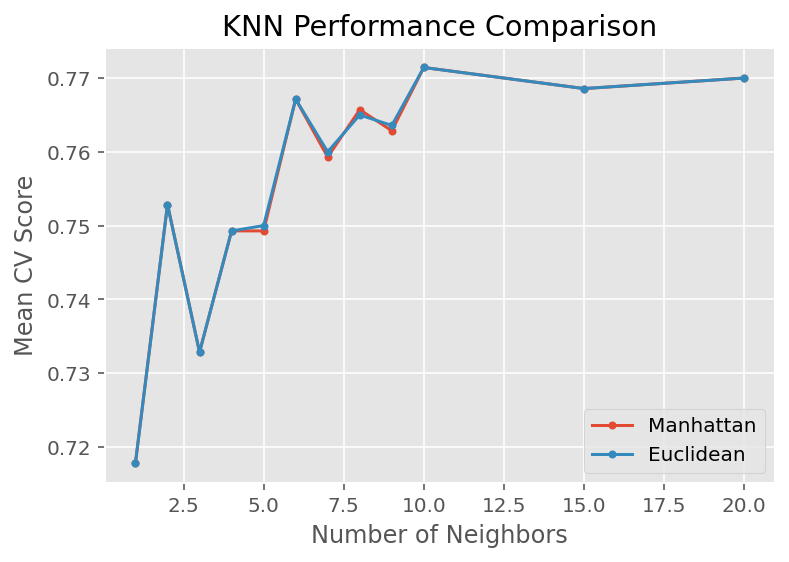

In [ ]:
#graph with hyperparameters

for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

The parameters used for hypertuning were Euclidean and manhattan distance and the number of neighbors.

By visualizaton we see that the nearest 10 neighbors using the Manhattan distance stand out and perform better than any other possible combination

In [ ]:
##predicts the response of KNN
k_pred = gs_KNN.predict(D_test)

print("Accuracy of KNN:",metrics.accuracy_score(t_test, k_pred))

Accuracy of KNN: 0.71


### Decision Tree

In [ ]:
#import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

In [ ]:
#define the parameter range for the decision tree

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,9,10,15,20],
             'min_samples_split': [2, 3,5]}

In [ ]:
#Gridsecarch to exclusively search through the best combinations


gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

In [ ]:
#fit the model to train

gs_DT.fit(D_train, t_train);

Fitting 15 folds for each of 72 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    2.9s finished


In [ ]:
#choose the best parameters using the Grid search function

gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [ ]:
gs_DT.best_score_

0.7826190476190477

In [ ]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

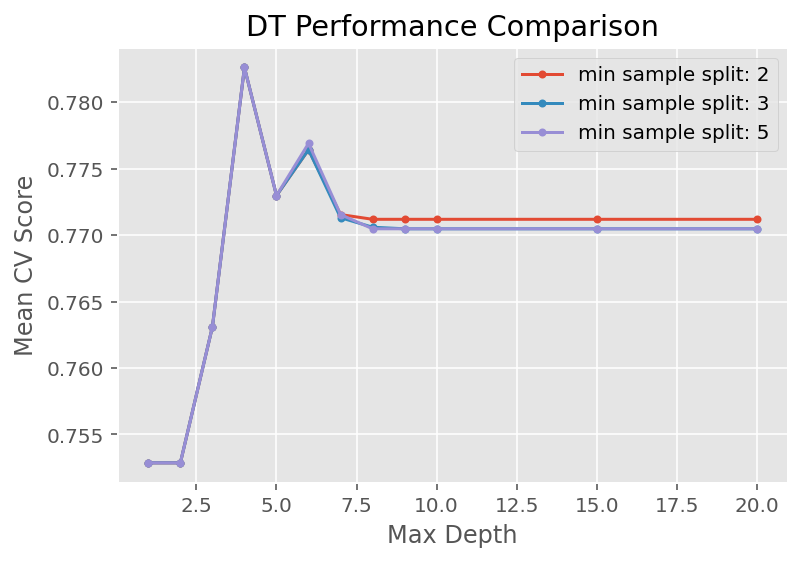

In [ ]:
#graph with hyperparameter tuning

for i in [2, 3, 5]:
    temp = results_DT[results_DT['min_samples_split'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = 'min sample split: ' + str(i))
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

The parameters used for hypertuning were criterion(gini or entopy, max_depth of the tree and minimum sample split

By visualizaton we see that criterion:gini and the tree with a maximum depth of 4 and min_sample split=2 and perform better than any other possible combination



In [ ]:
#predicts the response of DT 
dt_pred = gs_DT.predict(D_test)

print("Accuracy of Decision trees:",metrics.accuracy_score(t_test, dt_pred))

Accuracy of Decision trees: 0.765


### Naive Bayes

In [ ]:
from sklearn.metrics import classification_report

#import Naive Bayes (NB) model
from sklearn.naive_bayes import GaussianNB

#create NB classifier
clf_NB = GaussianNB(var_smoothing=10**(-3))

#train the model
clf_NB.fit(D_train, t_train)

#predict the response for test dataset
NB_pred = clf_NB.predict(D_test)

#print NB model accuracy
print("Naive Bayes accuracy:",metrics.accuracy_score(t_test, NB_pred))
#print(classification_report(t_test, NB_pred))

Naive Bayes accuracy: 0.76


In [ ]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(999)

nb_classifier = GaussianNB()

#define paramter range
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# GridSearch will do an exhaustive search over params_NB for an estimator
gs_NB = GridSearchCV(estimator=nb_classifier,param_grid=params_NB,cv=cv_method,verbose=1,scoring='accuracy')

#fit to train data
gs_NB.fit(D_train, t_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.0s finished


In [ ]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [ ]:
gs_NB.best_score_

0.7680952380952382

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

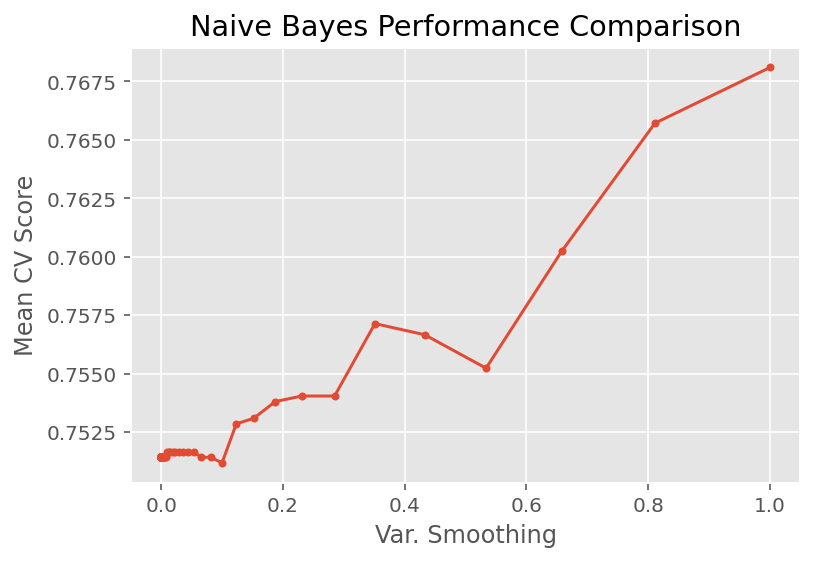

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("Naive Bayes Performance Comparison")
plt.show()

Tuning the single available parameter var smoothing for the Naive Bayes classifier shows an increased mean cv score with a higher number. This has improved accuracy slightly.

In [ ]:
#predict the response for test dataset with the Hyperparamter tuned model
hyper_NB_pred = gs_NB.predict(D_test)

print("Naive Bayes tuned accuracy:",metrics.accuracy_score(t_test, hyper_NB_pred))

Naive Bayes tuned accuracy: 0.7733333333333333


### SVM

In [ ]:
#import SVM model
from sklearn import svm

#create SVM classifier
clf_SVM = svm.SVC(kernel='linear')

#train the model using D_train and t_train
clf_SVM.fit(D_train, t_train)

#predict the target churn for test dataset
SVM_pred = clf_SVM.predict(D_test)

#print SVM model accuracy
print("SVM accuracy:",metrics.accuracy_score(t_test, SVM_pred))

SVM accuracy: 0.71


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()

#define parameter range
params_SVM = {'C': [0.1,1,10,100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['linear','rbf','poly','sigmoid']} 
  
gs_SVM = GridSearchCV(estimator=svm_classifier,param_grid=params_SVM,refit=True,verbose=1)
  
#fit the model for grid search
gs_SVM.fit(D_train, t_train);

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   10.3s finished


In [ ]:
gs_SVM.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
gs_SVM.best_score_

0.7792857142857142

In [ ]:
results_SVM = pd.DataFrame(gs_SVM.cv_results_['params'])
results_SVM['test_score'] = gs_SVM.cv_results_['mean_test_score']

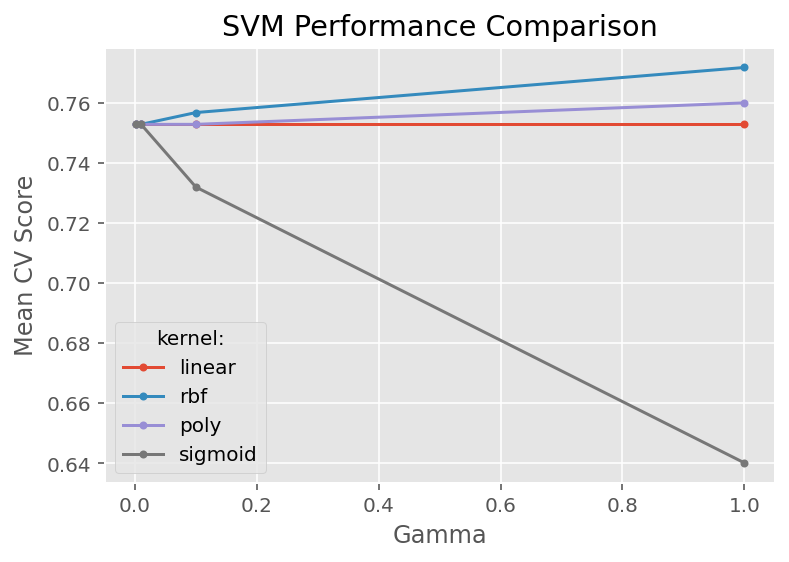

In [ ]:
#graph
for i in ['linear','rbf','poly','sigmoid']:
    temp = results_SVM[results_SVM['kernel'] == i]
    temp_average = temp.groupby('gamma').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)



plt.legend(title='kernel:')
plt.xlabel('Gamma')
plt.ylabel("Mean CV Score")
plt.title("SVM Performance Comparison")
plt.show()

SVM has many parameters available to tune which makes it more complicated than Naive Bayes. The graph shows that the rbf kernel performs best overall and a higher gamma is better except with the sigmoid kernel.

In [ ]:
#predict the response for test dataset with the Hyperparamter tuned model
hyper_SVM_pred = gs_SVM.predict(D_test)

print("SVM tuned accuracy:",metrics.accuracy_score(t_test, SVM_pred))

SVM tuned accuracy: 0.71


Interestingly on the test data the accuracy has shown little to no improvment despite showing a promising accuracy on the train data. This shows that good performance in training does not equal good performance later on.

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
BC_class = BaggingClassifier(n_estimators=10, random_state=0)

params_BC = {'bootstrap_features': [True, False],
             'n_estimators': [10, 20, 30, 40, 50]}

gs_BC = GridSearchCV(estimator=BC_class, 
                     param_grid=params_BC, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_BC.fit(D_train, t_train);

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    8.0s finished


In [ ]:
gs_BC.best_params_

{'bootstrap_features': True, 'n_estimators': 40}

In [ ]:
gs_BC.best_score_

0.7821428571428571

In [ ]:
results_BC = pd.DataFrame(gs_BC.cv_results_['params'])
results_BC['test_score'] = gs_BC.cv_results_['mean_test_score']
results_BC.columns

Index(['bootstrap_features', 'n_estimators', 'test_score'], dtype='object')

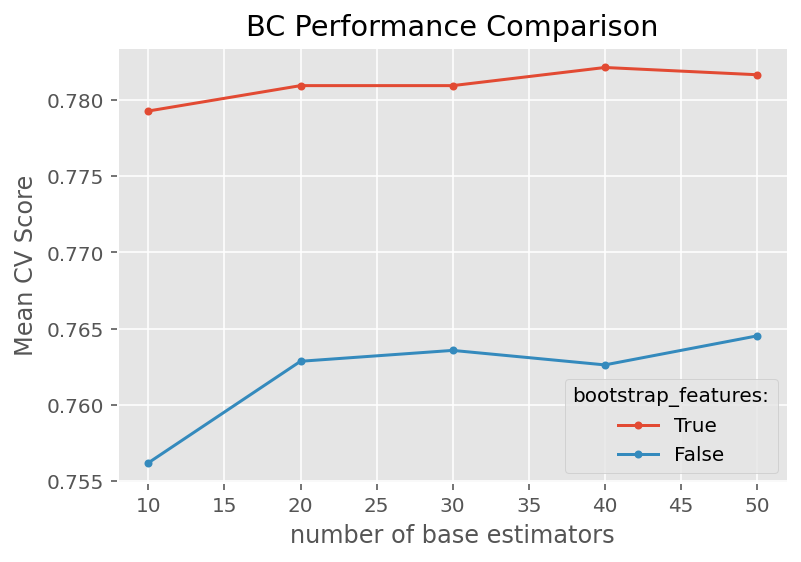

In [ ]:
for i in [True, False]:
    temp = results_BC[results_BC['bootstrap_features'] == i]
    temp_average = temp.groupby('n_estimators').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend(title='bootstrap_features:')
plt.xlabel('number of base estimators')
plt.ylabel("Mean CV Score")
plt.title("BC Performance Comparison")
plt.show()

In [ ]:
#predict the response for test dataset
BC_pred = gs_BC.predict(D_test)


print("GB accuracy:",metrics.accuracy_score(t_test, BC_pred))

GB accuracy: 0.7633333333333333


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_class = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)


params_GB = {'learning_rate': [0.1, 0.5, 1, 1.25, 1.5],
             'max_depth': [1, 2, 3],
             'loss': ['deviance', 'exponential']}

gs_GB = GridSearchCV(estimator=GB_class, 
                     param_grid=params_GB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_GB.fit(D_train, t_train);

Fitting 15 folds for each of 30 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   35.6s finished


In [ ]:
gs_GB.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 1}

In [ ]:
gs_GB.best_score_

0.7842857142857144

In [ ]:
results_GB = pd.DataFrame(gs_GB.cv_results_['params'])
results_GB['test_score'] = gs_GB.cv_results_['mean_test_score']
results_GB.columns

Index(['learning_rate', 'loss', 'max_depth', 'test_score'], dtype='object')

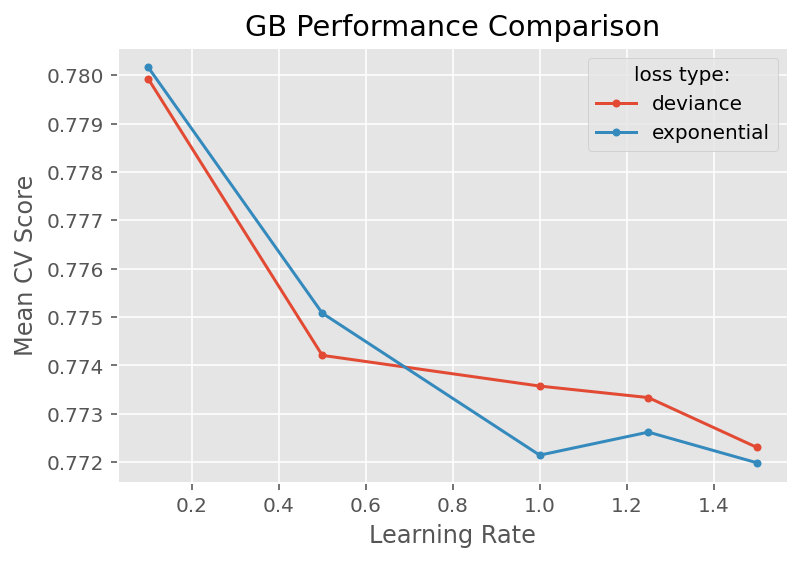

In [ ]:
for i in ['deviance', 'exponential']:
    temp = results_GB[results_GB['loss'] == i]
    temp_average = temp.groupby('learning_rate').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend(title='loss type:')
plt.xlabel('Learning Rate')
plt.ylabel("Mean CV Score")
plt.title("GB Performance Comparison")
plt.show()

In [ ]:
#predict the response for test dataset
GB_pred = gs_GB.predict(D_test)


print("GB accuracy:",metrics.accuracy_score(t_test, GB_pred))

GB accuracy: 0.765


# Model Comparison

For the hyper paramter tuning phase the 1400 row train dataset was used inside a cross-validation framework to achieve the best tuned paramters for the 6 classifiers. The next step would be to verify the performance of these classifiers fitting them to the 600 row test data. For the model comparison we have narrowed down to three classifiers to simplify the comparison. We will perform t-tests in pairs to see the comparitive statistical differences in two classifiers. The combination we are conducting to determine an AUC score are as follows:
1. NB vs. DT
2. GB vs. NB
3. GB vs. DT

In [ ]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_DT.mean()

0.8029940720474237

In [ ]:
cv_results_NB = cross_val_score(estimator=nb_classifier,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_NB.mean()

0.8184279851475473

In [ ]:
cv_results_GB = cross_val_score(estimator=GB_class,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_GB.mean()

0.8274288319979154

With the same random state each classifier has been fitted with the same data sections making them comparable. Next we will run the t-tests. We find that using the AUC metric Gradient Boosting scores the highest.

In [ ]:
print(stats.ttest_rel(cv_results_NB, cv_results_DT))
print(stats.ttest_rel(cv_results_GB, cv_results_NB))
print(stats.ttest_rel(cv_results_GB, cv_results_DT))

Ttest_relResult(statistic=2.665934458593104, pvalue=0.018445913894352312)
Ttest_relResult(statistic=2.7089037872839588, pvalue=0.016958294398945594)
Ttest_relResult(statistic=5.094428640070421, pvalue=0.000163362132211706)


Now AUC is not a universal metric that means the highest scoring classifier will perform best for the business, metrics such as accuracy, precision, recall, f1 score and should accompany the decision making process

In [ ]:
#print classification reports for each classifier
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, k_pred))

print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, dt_pred))

print("\nClassification report for Naive Bayes") 
print(classification_report(t_test, hyper_NB_pred))

print("\nClassification report for Support Vector Machine") 
print(classification_report(t_test, SVM_pred))

print("\nClassification report for Bagging") 
print(classification_report(t_test, BC_pred))

print("\nClassification report for Gradient Boosting") 
print(classification_report(t_test, GB_pred))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       426
           1       0.00      0.00      0.00       174

    accuracy                           0.71       600
   macro avg       0.35      0.50      0.42       600
weighted avg       0.50      0.71      0.59       600


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       426
           1       0.63      0.45      0.53       174

    accuracy                           0.77       600
   macro avg       0.72      0.67      0.69       600
weighted avg       0.75      0.77      0.75       600

NB
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       426
           1       0.62      0.57      0.59       174

    accuracy                           0.77       600
   macro avg       0.72      0.71     

Since in the telecommunication a customer churning (false negative)has a bigger negative impact then offering a customer that wasn't going to churn a promotion (false positive), a high recall is favourable as recall=true positive/truepositive+false negative. The classifier with the highest average recall was Naive Bayes.

### Critique & Limitations

In this report we split the data 70:30, with the hyper paramter tuning occuring within the train data. Ideally this is normally done on a seperate test so the tuning benefits may not have been fully realised. The feature selection was performed within a train / test approach that would have otherwise risked being overfitted if not been done that way. Our highest performing classifier based on AUC was Gradient Bagging however taking into consideration the training time was not in scope of this report. A limitation of this report is the individual performance of the trainging and prediction speed of each classifier, for example SVM uses less memory than NB as it uses a subset of train, this will need to be considered further as it may play a crucial role in the implementation and performance in a system. 

(Task 4) (15 points) Summary & Conclusions: This section needs to include the following subsections:
(Task 4.1) (5 points) Project Summary: A comprehensive summary of your entire project (both Phase 1 and Phase 2).
(Task 4.2) (5 points) Summary of Findings: A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?
(Task 4.3) (5 points) Conclusions: Your detailed conclusions as they relate to your goals and objectives.

# Summary & Conclusions

### Project Summary

In phase 1 we check the whole dataset of telecom_users, to see if there are any missing values and remove the rows if any. We also delete Id columns which do not contribute anything of value.We also check for white spaces remove them and convert the data type from object to float.
The dataset is now cleaned.
We perform some visualizations for a better understanding of the features in the dataset
The cleaned dataset is stored in tel_sample.csv. We have 19 festures in our datset of which 15 are descriptive and 4 are numerical. The target feature is separated from the dataset and treated as a stand alone dataset through out our analysis We perform one hot encoding of the 15 descriptive features to turn them into numerical features. We also perform target encoding for our target feature as 1:yes and 0:no We then scale all the features using the min_max scalar, for our features to be between 0 and 1.

We split the dataset into train and test splits in the raio of 70:30. The train dataset now has 1400 rows and test dataset has 600.

Before fiitting the model We select the 5 best features to avoid overfitting and for better performance. We use the Decision tree classifier as the Wrapper Firstly We assess the performance using all the features in the dataset. We use stratified 5-fold cross-validation with 3 repetitions with a random state of 999.

The following feature selection methods are used: 
F-score <br>
Mutual information <br>
Random forest importance <br>
 SPSA<br>

Of which we find that SPSA method is the most effective. So we use the 5 best features given by the SPSA method for further analysis. which include Dependents, DeviceProtection, tenure, PaymentMethod,TechSupport.

The following algorithms are used subsequently for the predictive modelling

.K-Nearest Neighbors <br>
Decision trees <br>
.Naive Bayes <br>
SVM <br>
Bagging <br>
Gradient Boosting <br>

We fit the model on train data and evaluate its performance on the test dataset. we conduct a 5-fold stratified cross-validation to fine-tune hyperparameters of each classifier we use the Grid search function that searches through all the best combinations in the train phase and provide the hyperaparameters with the highest accuracy score.

We use the plot to show the same.

Once we have identify the respective hyper parameters for the respective classifiers we fit the model on the test data

After subsequently performing all the above algorithms We compare the Models using paired t-tests to see if there is a statistical significance. And construct a classification report for each of the models with respect to their recall scores and confusion matrices on the test data.

### Summary of Findings

After going through several features selction methods we find that for this particular case num_features=5 using the Spsa method works the best.

The accuracy of Naive Bayes is 0.77 and the accuracy of its prediction on the test dataset when compared to all other algorithms yields better results

When evaluated on the test data using cross validation,the Gradient Boosting  outperforms both Naive Bayes and Decision tree with respect to AUC.With a score of 0.827

Henceforth we see that the K nearest neighbor and SVM have the  highest recall of 1.00

When performed the paired t-tests we see that the t-statisic of the pair GB and DT is 5.094 and it is statistically significant with a p values<0.05

### Conclusion

Hence we conclude that using only a subset of features than all the features available in the dataset leads way for best fit of a model avoiding probelms such as overfitting, poor performance etc.

it also curbs excess computational time and leads to better understanding of the dataset.


Hyperparameter tuning of a classifier also paves way for a model to select its best parameters 


